In [24]:
import sys
print(sys.executable)
!\Users\melinadiaz\anaconda3\python -m pip install wordcloud
!\Users\melinadiaz\anaconda3\python -m pip install nrclex
!\Users\melinadiaz\anaconda3\python -m pip install text2emotion

C:\Users\melinadiaz\anaconda3\python.exe
  Using cached text2emotion-0.0.5-py3-none-any.whl (57 kB)
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170300 sha256=96f256436eccc7ef0491ecac3a414b1e2f31d2adeaebdd9e3d0b1d6748719648
  Stored in directory: c:\users\melinadiaz\appdata\local\pip\cache\wheels\e5\c7\b3\b62b7809b5ea6d22241a713d9cc05741d7edaec674b9d61cb7
Successfully built emoji


In [16]:
import pandas as pd #used for working with dataframes—our dataset
import numpy as np #used to manipulate arrays
import matplotlib.pyplot as plt #for making visuals
import seaborn as sns #for making visuals too
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nrclex import NRCLex
from collections import OrderedDict

In [17]:
ArianaGrande=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\ArianaGrande.csv")
Beyonce=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\Beyonce.csv")
BillieEilish=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\BillieEilish.csv")
BTS=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\BTS.csv")
CardiB=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\CardiB.csv")
CharliePuth=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\CharliePuth.csv")
ColdPlay=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\ColdPlay.csv")
Drake=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\Drake.csv")
DuaLipa=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\DuaLipa.csv")
EdSheeran=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\EdSheeran.csv")
Eminem=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\Eminem.csv")
JustinBieber=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\JustinBieber.csv")
KatyPerry=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\KatyPerry.csv")
Khalid=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\Khalid.csv")
LadyGaga=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\LadyGaga.csv")
Maroon5=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\Maroon5.csv")
NickiMinaj=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\NickiMinaj.csv")
PostMalone=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\PostMalone.csv")
Rihanna=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\Rihanna.csv")
SelenaGomez=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\SelenaGomez.csv")
TaylorSwift=pd.read_csv(r"C:\Users\melinadiaz\Downloads\pop_singers_csv\TaylorSwift.csv")
#21 artists


In [18]:
alldf=ArianaGrande.append([Beyonce, BillieEilish, BTS, CardiB, CharliePuth, ColdPlay, 
                           Drake, DuaLipa, EdSheeran, Eminem, JustinBieber, KatyPerry, 
                           Khalid, LadyGaga, Maroon5, NickiMinaj, PostMalone, Rihanna, 
                           SelenaGomez, TaylorSwift], ignore_index=True)
alldf
artists=alldf["Artist"].unique()

In [19]:
alldf=alldf.drop(columns="Unnamed: 0")
alldf

Artist                                              Title  \
0     Ariana Grande                                     ​thank u, next   
1     Ariana Grande                                            7 rings   
2     Ariana Grande                                    ​God is a woman   
3     Ariana Grande                                       Side To Side   
4     Ariana Grande                             ​​no tears left to cry   
...             ...                                                ...   
6022   Taylor Swift  Teardrops on my Guitar (Live from Clear Channe...   
6023   Taylor Swift                                 Evermore [Forward]   
6024   Taylor Swift                              Welcome Back Grunwald   
6025   Taylor Swift                  Tolerate it (Polskie Tłumaczenie)   
6026   Taylor Swift                                           Find you   

                                       Album        Date  \
0                              thank u, next  2018-11-03   
1                              thank u, next  2019-01-18   
2                                  Sweetener  2018-07-13   
3                            Dangerous Woman  2016-05-20   
4                                  Sweetener  2018-04-20   
...                                      ...         ...   
6022  Live From Clear Channel Stripped 2008   2008-06-28   
6023                                     NaN  2020-12-11   
6024                                     NaN         NaN   
6025                                     NaN  2020-12-11   
6026                                     NaN         NaN   

                                                  Lyric    Year  
0     thought i'd end up with sean but he wasn't a m...    2018  
1     yeah breakfast at tiffany's and bottles of bub...    2019  
2     you you love it how i move you you love it how...    2018  
3     ariana grande  nicki minaj i've been here all ...    2016  
4     right now i'm in a state of mind i wanna be in...    2018  
...                                                 ...     ...  
6022  drew looks at me i fake a smile so he won't se...  2008.0  
6023  to put it plainly we just couldnt stop writing...  2020.0  
6024  turn wycd on you're on your grunwald back from...     NaN  
6025  zwrotka  siedzę i patrzę jak czytasz z głową p...  2020.0  
6026  trying just like they say just taking the step...     NaN  

[6027 rows x 6 columns]

In [20]:
AGalbums=["thank u, next","Yours Truly", "Sweetener","Positions", "My Everything", "Dangerous Woman"]
AGindexes=[]
AGlyrics=""
type(ArianaGrande.shape[0])
for i in range(ArianaGrande.shape[0]):
    if ArianaGrande.iloc[i,2] in AGalbums:
        AGindexes.append(i)
        AGlyrics+=ArianaGrande.iloc[i,4]
        #songname=ArianaGrande.iloc[i,1]
        #score=te.get_emotion(ArianaGrande.iloc[i,4])
        #print(songname,": ",score)
AGlyrics

"thought i'd end up with sean but he wasn't a match wrote some songs about ricky now i listen and laugh even almost got married and for pete i'm so thankful wish i could say thank you to malcolm 'cause he was an angel  pre one taught me love one taught me patience and one taught me pain now i'm so amazing say i've loved and i've lost but that's not what i see so look what i got look what you taught me and for that i say   thank you next next thank you next next thank you next i'm so fuckin' grateful for my ex thank you next next thank you next next thank you next next i'm so fuckin'   spend more time with my friends i ain't worried 'bout nothin' plus i met someone else we havin' better discussions i know they say i move on too fast but this one gon' last 'cause her name is ari and i'm so good with that so good with that  pre she taught me love love she taught me patience patience how she handles pain pain that shit's amazing yeah she's amazing i've loved and i've lost yeah yeah but tha

In [28]:
AGlyrics1=NRCLex(AGlyrics)
sortedkeys=AGlyrics1.raw_emotion_scores.keys()
mydic=AGlyrics1.raw_emotion_scores
#mydic=dict(sorted(mydic.items()))
keys=list(mydic.keys())
values=list(mydic.values())



[Text(0, 0, 'anticipation'),
 Text(1, 0, 'joy'),
 Text(2, 0, 'positive'),
 Text(3, 0, 'surprise'),
 Text(4, 0, 'trust'),
 Text(5, 0, 'fear'),
 Text(6, 0, 'negative'),
 Text(7, 0, 'sadness'),
 Text(8, 0, 'anger'),
 Text(9, 0, 'disgust')]

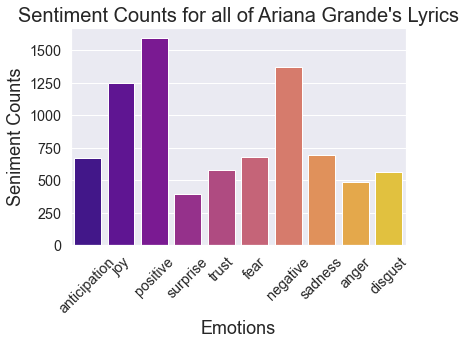

In [29]:
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Ariana Grande's Lyrics", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
#I don't like that the bright colors are on the negative side, and the darker colors are on the positive side

In [30]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melinadiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melinadiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\melinadiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
te.get_emotion(AGlyrics)
#this takes to much time because it calculates scores for all words of Ariana Grande's lyrics

In [32]:
te.get_emotion(ArianaGrande.iloc[7,4])
#this is just one song.

{'Happy': 0.26, 'Angry': 0.0, 'Surprise': 0.13, 'Sad': 0.44, 'Fear': 0.18}

In [41]:
#sorry for the profanity in this cell, but I had to delete these words for the wordclouds
test=pd.DataFrame(columns=["Artist", "Title", "Album", "Date", "Lyric", "Year"])
test
bff=["Ariana Grande", "ariana", "grande", "BeyoncÉ", "Billie Eilish","billie", "eilish", "BTS", "Cardi B", "cardi", "b",
     "Charlie Puth", "charlie", "puth", "chris martin", "chris", "martin", "Drake", "Dua Lipa", "dua", "lipa", "Ed Sheeran", "ed", "sheeran",
     "Eminem", "Justin Bieber", "justin", "bieber", "Katy Perry", "katy", "perry", "Khalid", "Lady Gaga", "lady", "gaga"
     "Maroon5", "Nicki Minaj", "nicki", "minaj", "Post Malone", "post", "malone", "Rihanna", "Selena Gomez", "selena",
     "gomez", "taylor", "swift", "Taylor Swift", "pre", "adam", "levine", "shit", "fuck", "bitch", "bitches", "nigga",
     "niggas", "fuckin'", "ass", "motherfucker", "dick", "fucked", "fucking", "pussy"]
for i in range(len(bff)):
    bff[i]=bff[i].lower()

Cluster: Ariana Grande


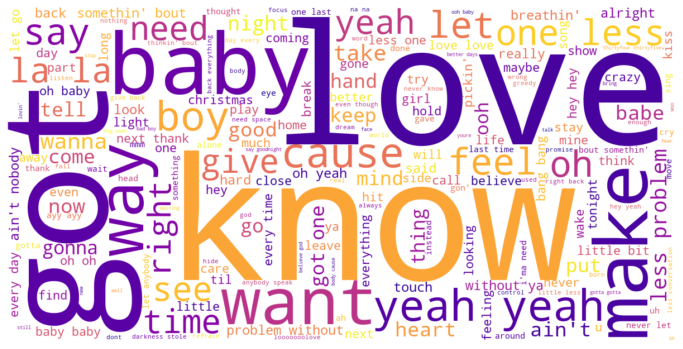

Cluster: Beyoncé


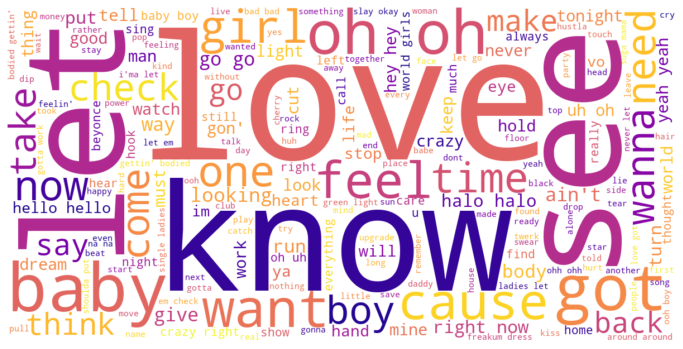

Cluster: Billie Eilish


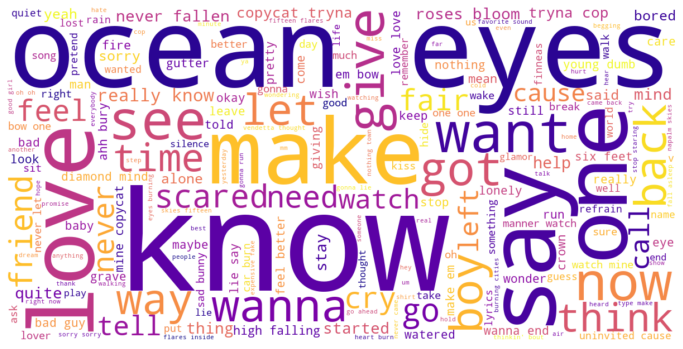

Cluster: BTS (방탄소년단)


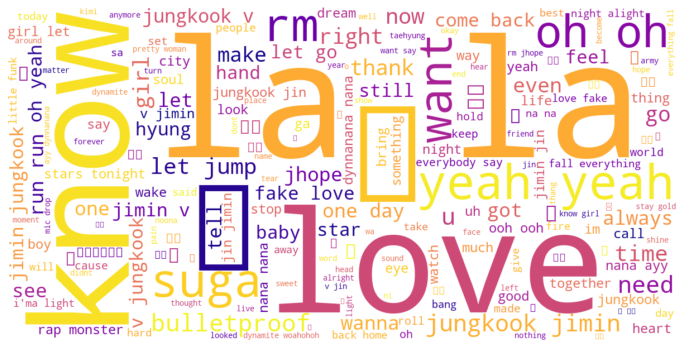

Cluster: Cardi B


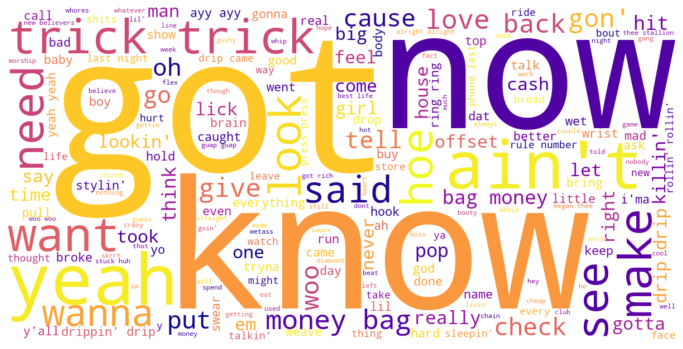

Cluster: Charlie Puth


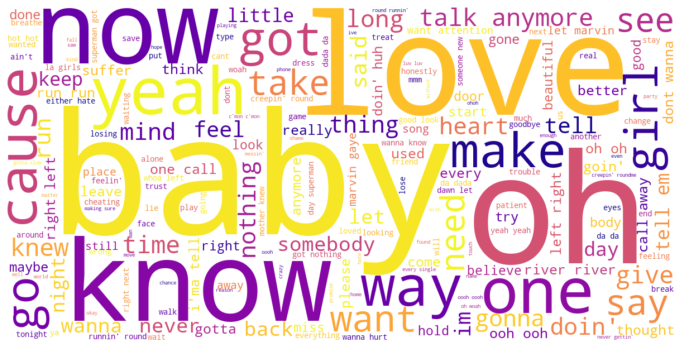

Cluster: Coldplay


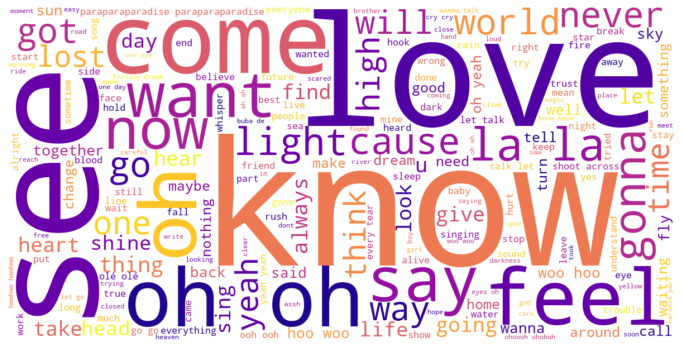

Cluster: Drake


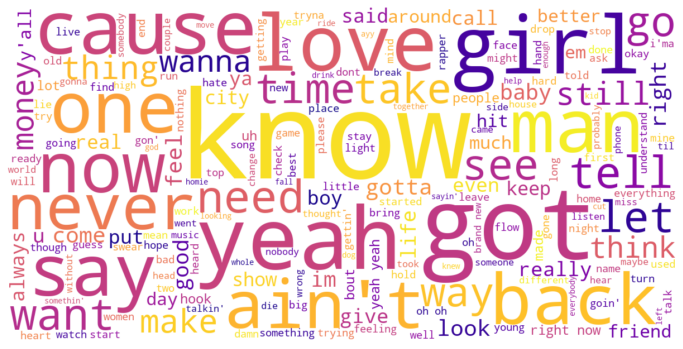

Cluster: Dua Lipa


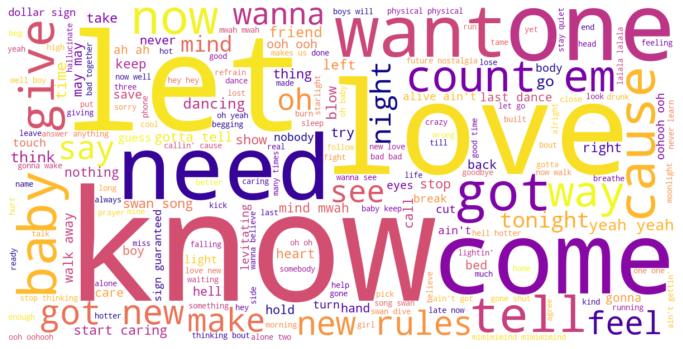

Cluster: Ed Sheeran


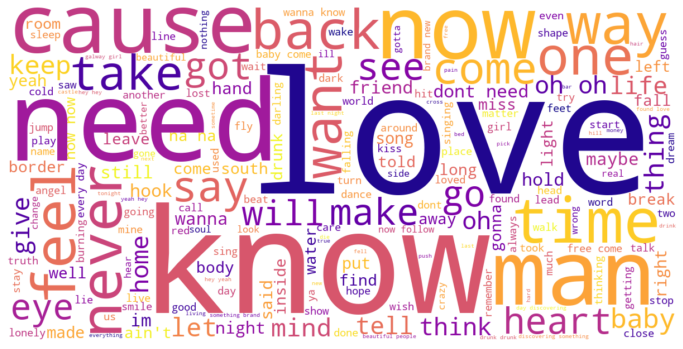

Cluster: Eminem


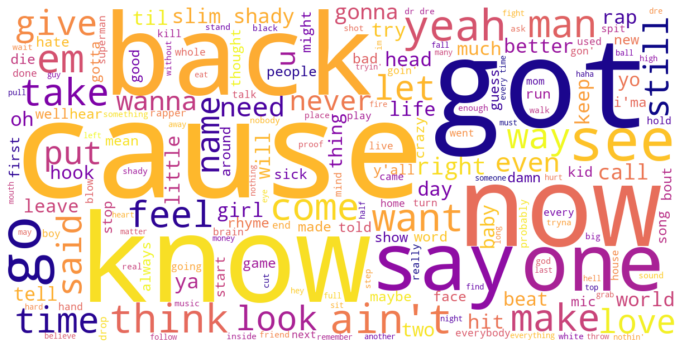

Cluster: Justin Bieber


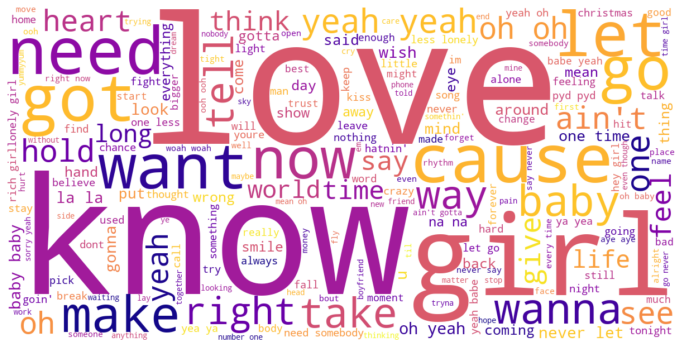

Cluster: Katy Perry


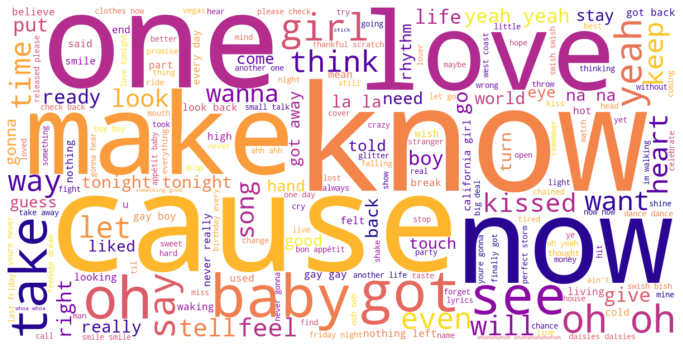

Cluster: Khalid


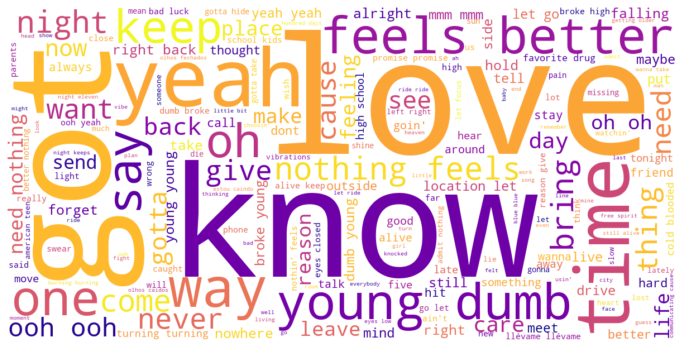

Cluster: Lady Gaga


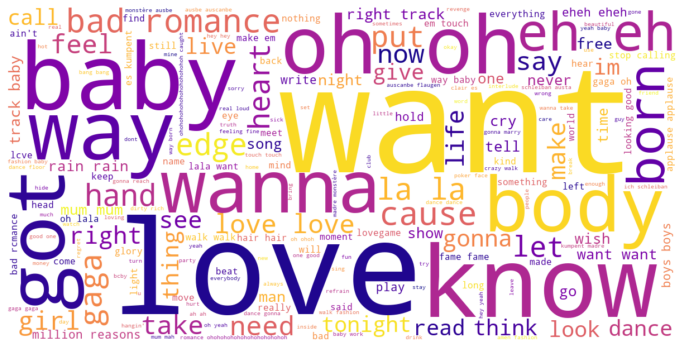

Cluster: Maroon 5


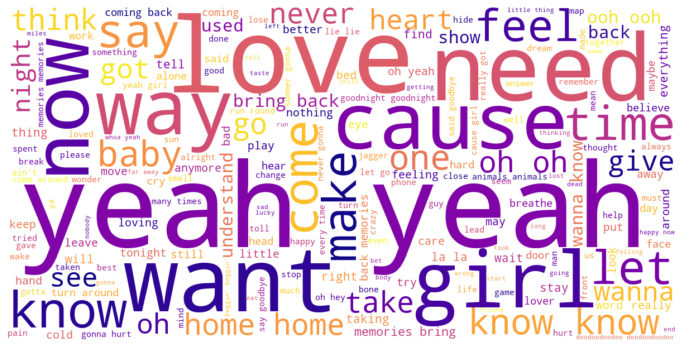

Cluster: Nicki Minaj


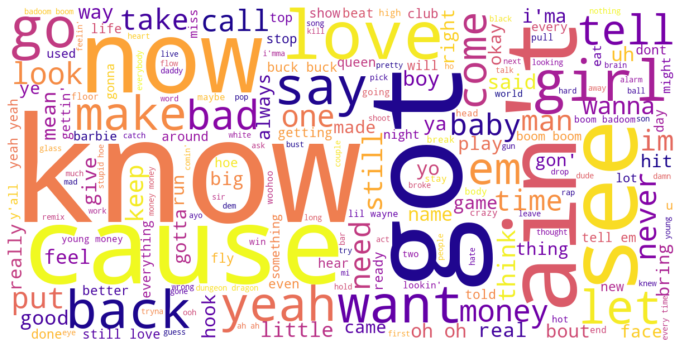

Cluster: Post Malone


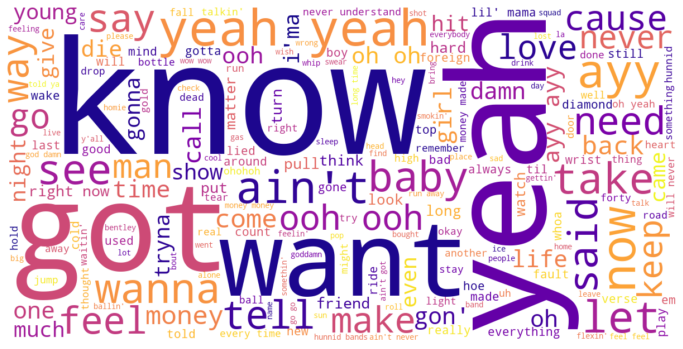

Cluster: Rihanna


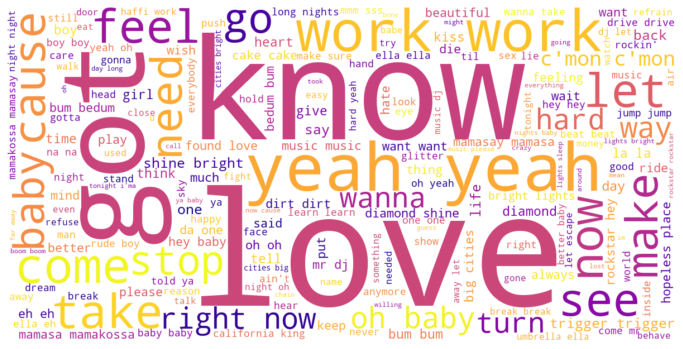

Cluster: Selena Gomez


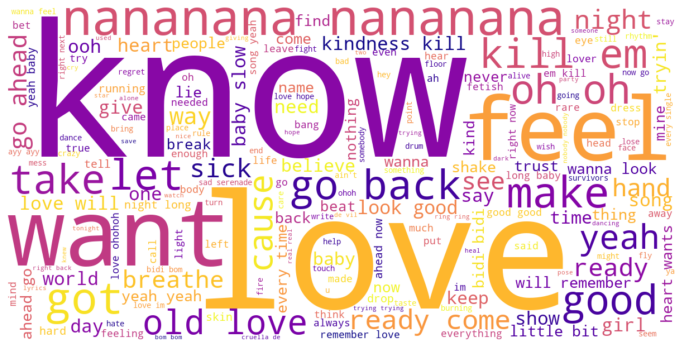

Cluster: Taylor Swift


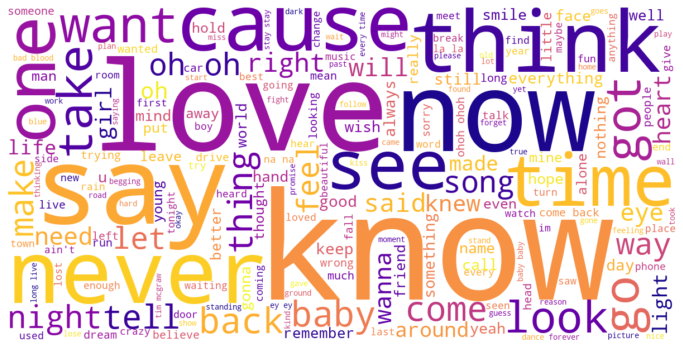

In [43]:
df=ArianaGrande
AGalbums=["thank u, next","Yours Truly", "Sweetener","Positions", "My Everything", "Dangerous Woman"]
Balbums=["Dangerously In Love", "B’Day", "I Am... Sasha Fierce", "4", "BEYONCÉ", "Lemonade"]
BEalbums=["WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japanese Import)"]
BTSalbums=["Dark&Wild", "WINGS", "LOVE YOURSELF 轉 ‘Tear’", "MAP OF THE SOUL: 7", "BE"]
CBalbums=["Invasion of Privacy"]
CPalbums=["Nine Track Mind", "Voicenotes"]
Calbums=["Parachutes", "A Rush of Blood to the Head", "X&Y", "Viva La Vida or Death and All His Friends",
         "Mylo Xyloto", "Ghost Stories", "A Head Full of Dreams", "Everyday Life", "Music of the Spheres"] 
Dalbums=["Thank Me Later", "Take Care", "Nothing Was the Same", "Views", "Scorpion", "Certified Lover Boy"]
DLalbums=["Dua Lipa", "Future Nostalgia"]
ESalbums=["+ (Plus)", "× (Multiply)", "÷ (Divide)", "No.6 Collaborations Project"]
Ealbums=["Infinite", "The Slim Shady LP", "The Marshall Mathers LP",
         "The Eminem Show", "Encore", "Relapse", "Recovery",
         "The Marshall Mathers LP2 (Deluxe)", "Revival", "Kamikaze",
         "Music to Be Murdered By"]
JBalbums=["My World 2.0", "Under the Mistletoe", "Believe",
          "Purpose (Deluxe)", "Changes"] #Justice
KPalbums=["Katy Hudson", "One of the Boys", "Teenage Dream",
          "PRISM", "Witness", "Smile (Fan Edition)"]
Kalbums=["American Teen", "Free Spirit"] #"Everything Is Changing"
LGalbums=["The Fame", "Born This Way", "ARTPOP", "Joanne",
          "Chromatica", "Cheek to Cheek"] #"Love for Sale"]
Malbums=["Songs About Jane", "It Won’t Be Soon Before Long",
         "Hands All Over", "Overexposed", "V", "Red Pill Blues"]
         #"Jordi"]
NMalbums=["Pink Friday", "Pink Friday: Roman Reloaded",
          "The Pinkprint", "Queen (Bonus Version)"]
PMalbums=["Stoney (Deluxe)", "beerbongs & bentleys", "Hollywood’s Bleeding"]
Ralbums=["Music of the Sun (UK Edition)", "A Girl Like Me",
         "Good Girl Gone Bad", "Rated R", "Loud",
         "Talk That Talk", "Unapologetic", "ANTI"]
SGalbums=["Stars Dance", "Revival", "Rare (Target Exclusive)"] #"Kiss & Tell", "A Year Without Rain", "When the Sun Goes Down"]
TSalbums=["Taylor Swift", "Fearless", "Speak Now", "Red (Deluxe Edition)",
          "1989", "reputation", "Lover", "folklore", "evermore"]

STOPWORDS.update(bff)

for k in artists:
    s=alldf[alldf["Artist"]==k]
    s.reset_index()
    for i in range(s.shape[0]):
        if k == 'Ariana Grande':
            album=AGalbums
        if k == 'Beyoncé':
            album=Balbums
        if k == 'Billie Eilish':
            album=BEalbums
        if k == 'BTS (방탄소년단)':
            album=BTSalbums
        if k == 'Cardi B':
            album=CBalbums
        if k =='Charlie Puth':
            album=CPalbums
        if k == 'Coldplay':
            album=Calbums
        if k == 'Drake':
            album=Dalbums
        if k == 'Dua Lipa':
            album=DLalbums
        if k == 'Ed Sheeran':
            album=ESalbums
        if k == 'Eminem':
            album=Ealbums
        if k == 'Justin Bieber':
            album=JBalbums
        if k == 'Katy Perry':
            album=KPalbums
        if k == 'Khalid':
            album=Kalbums
        if k == 'Lady Gaga':
            album=LGalbums
        if k == 'Maroon 5':
            album=Malbums
        if k == 'Nicki Minaj':
            album=NMalbums
        if k == 'Post Malone':
            album=PMalbums
        if k == 'Rihanna':
            album=Ralbums
        if k == 'Selena Gomez':
            album=SGalbums
        if k == 'Taylor Swift':
            album=TSalbums
        
        if s.iloc[i,2] in album:
            test=test.append(s.iloc[i,:])
    """text=s['Lyric'].str.cat(sep=' ')
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    titles=alldf[alldf["Artist"]==k]['Title']
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()"""
    
    print('Cluster: {}'.format(k))
    text=s['Lyric'].str.cat(sep=' ')
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud( max_words=200, background_color="white", collocations=True, colormap="plasma",
                          stopwords=STOPWORDS, width=1200, height=600).generate(text)
    titles=alldf[alldf["Artist"]==k]['Title']
    plt.figure(figsize=(12,7))
    1021726
    
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


{'fear': 0.08132996495803113, 'anger': 0.06446092413006276, 'anticip': 0.0, 'trust': 0.0911091190612012, 'surprise': 0.0513405590416429, 'positive': 0.20593268682258983, 'negative': 0.13894548121587483, 'sadness': 0.0828783310243664, 'disgust': 0.04612501018661886, 'joy': 0.1461168608915329, 'anticipation': 0.09176106266807921}


Text(0.5, 1.0, "Sentiment Counts for all of Beyoncé's Lyrics")

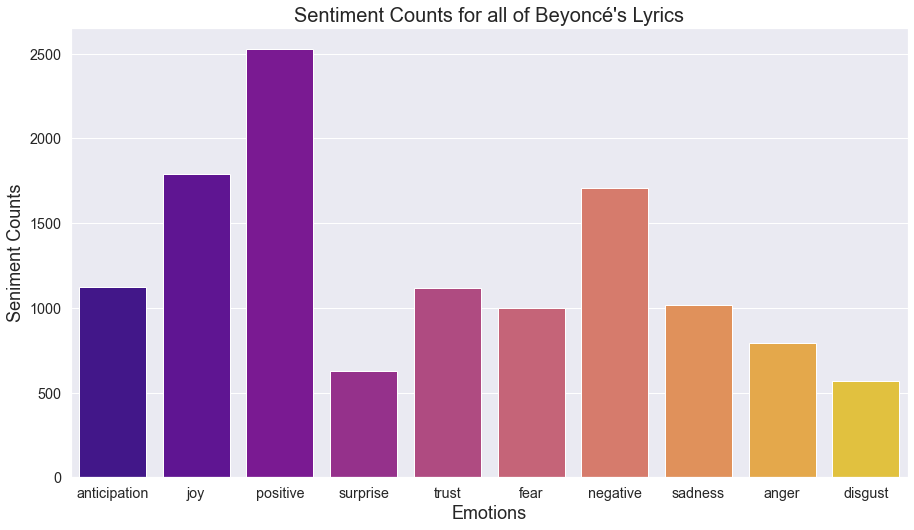

In [46]:
sns.set(rc={'figure.figsize':(15,8.27)})
Blyrics=""
for i in range(Beyonce.shape[0]):
    if Beyonce.iloc[i,3] in Balbums:
        Blyrics+=Beyonce.iloc[i,6]
AGlyrics1=NRCLex(Blyrics)
print(AGlyrics1.affect_frequencies)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Beyoncé's Lyrics", fontsize=20)


Text(0.5, 1.0, "Sentiment Counts for all of Billie Eilish's Lyrics")

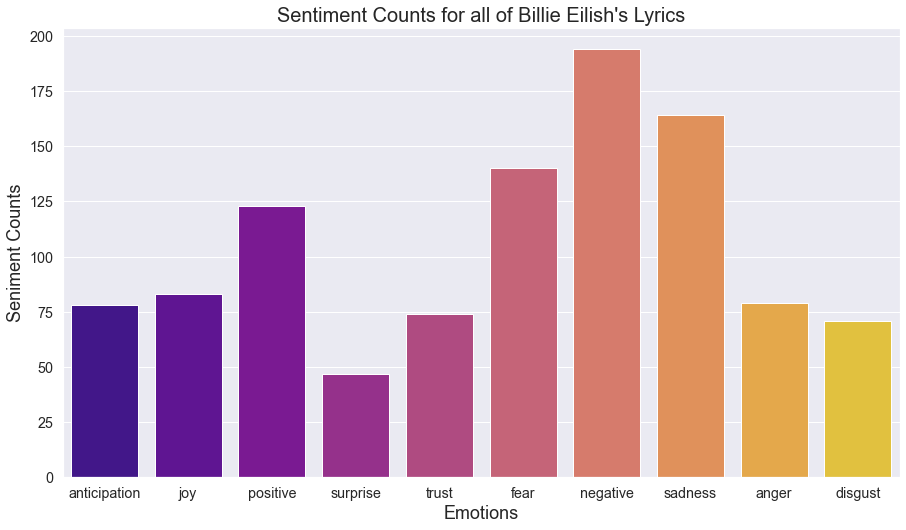

In [47]:
BElyrics=""
for i in range(BillieEilish.shape[0]):
    if BillieEilish.iloc[i,3] in BEalbums:
        BElyrics+=BillieEilish.iloc[i,6]
AGlyrics1=NRCLex(BElyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Billie Eilish's Lyrics", fontsize=20)

In [48]:
artists

array(['Ariana Grande', 'Beyoncé', 'Billie Eilish', 'BTS (방탄소년단)',
       'Cardi B', 'Charlie Puth', 'Coldplay', 'Drake', 'Dua Lipa',
       'Ed Sheeran', 'Eminem', 'Justin Bieber', 'Katy Perry', 'Khalid',
       'Lady Gaga', 'Maroon 5', 'Nicki Minaj', 'Post Malone', 'Rihanna',
       'Selena Gomez', 'Taylor Swift'], dtype=object)

Text(0.5, 1.0, "Sentiment Counts for all of Cardi B's Lyrics")

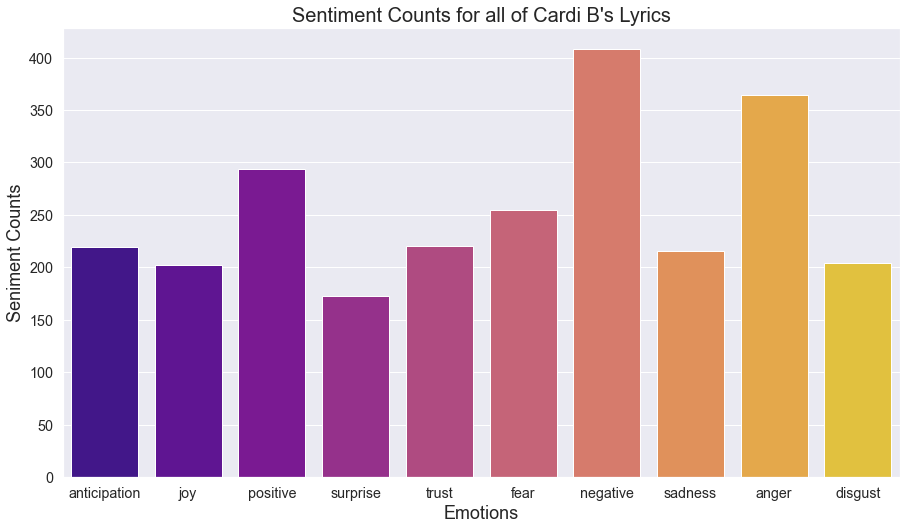

In [49]:
CBlyrics=""
for i in range(CardiB.shape[0]):
    if CardiB.iloc[i,3] in CBalbums:
        CBlyrics+=CardiB.iloc[i,6]
AGlyrics1=NRCLex(CBlyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Cardi B's Lyrics", fontsize=20)

Text(0.5, 1.0, "Sentiment Counts for all of Charlie Puth's Lyrics")

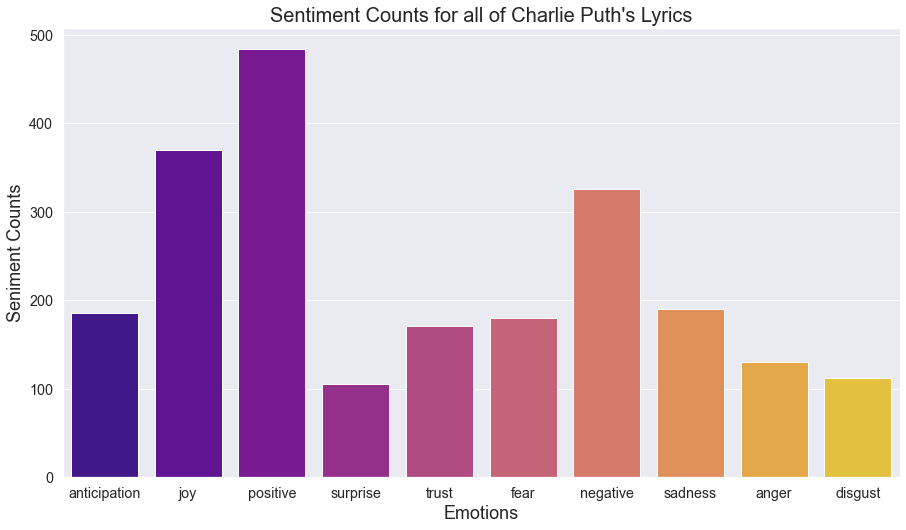

In [50]:
CPlyrics=""
for i in range(CharliePuth.shape[0]):
    if CharliePuth.iloc[i,3] in CPalbums:
        CPlyrics+=CharliePuth.iloc[i,6]
AGlyrics1=NRCLex(CPlyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Charlie Puth's Lyrics", fontsize=20)

Text(0.5, 1.0, "Sentiment Counts for all of Drake's Lyrics")

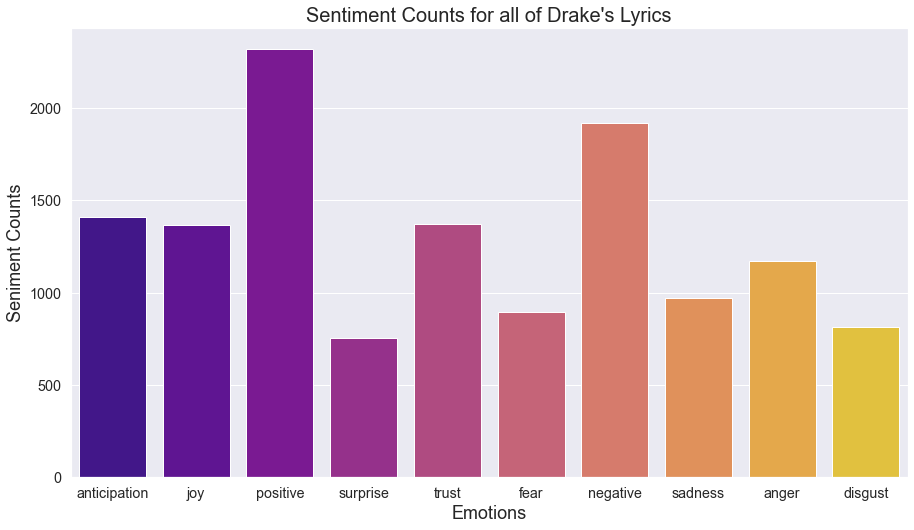

In [51]:
Dlyrics=""
for i in range(Drake.shape[0]):
    if Drake.iloc[i,3] in Dalbums:
        Dlyrics+=Drake.iloc[i,6]
AGlyrics1=NRCLex(Dlyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Drake's Lyrics", fontsize=20)

Text(0.5, 1.0, "Sentiment Counts for all of Charlie Puth's Lyrics")

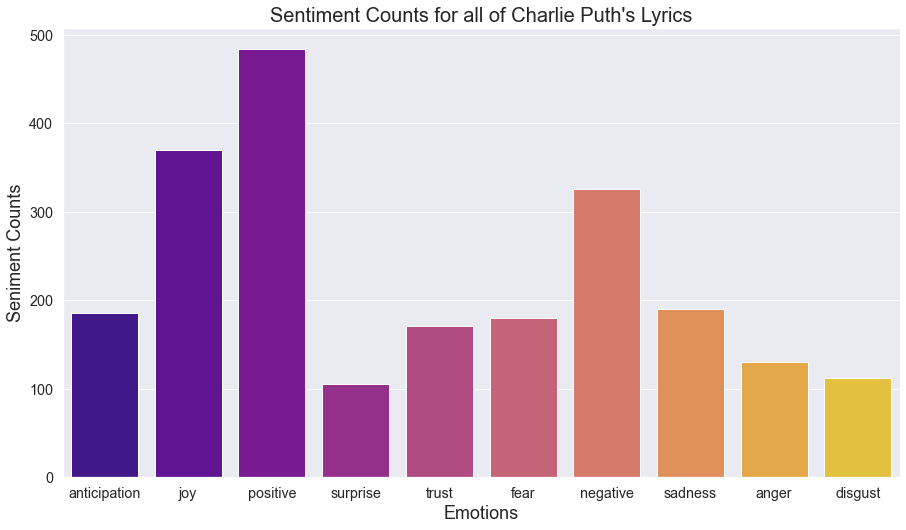

In [52]:
CPlyrics=""
for i in range(CharliePuth.shape[0]):
    if CharliePuth.iloc[i,3] in CPalbums:
        CPlyrics+=CharliePuth.iloc[i,6]
AGlyrics1=NRCLex(CPlyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Charlie Puth's Lyrics", fontsize=20)

Text(0.5, 1.0, "Sentiment Counts for all of Dua Lipa's Lyrics")

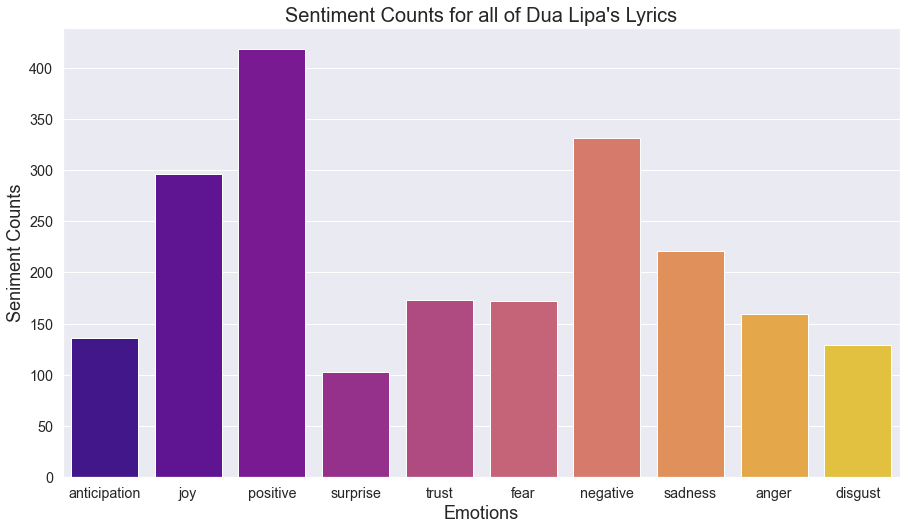

In [53]:
DLlyrics=""
for i in range(DuaLipa.shape[0]):
    if DuaLipa.iloc[i,3] in DLalbums:
        DLlyrics+=DuaLipa.iloc[i,6]
AGlyrics1=NRCLex(DLlyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Dua Lipa's Lyrics", fontsize=20)

Text(0.5, 1.0, "Sentiment Counts for all of Ed Sheeran's Lyrics")

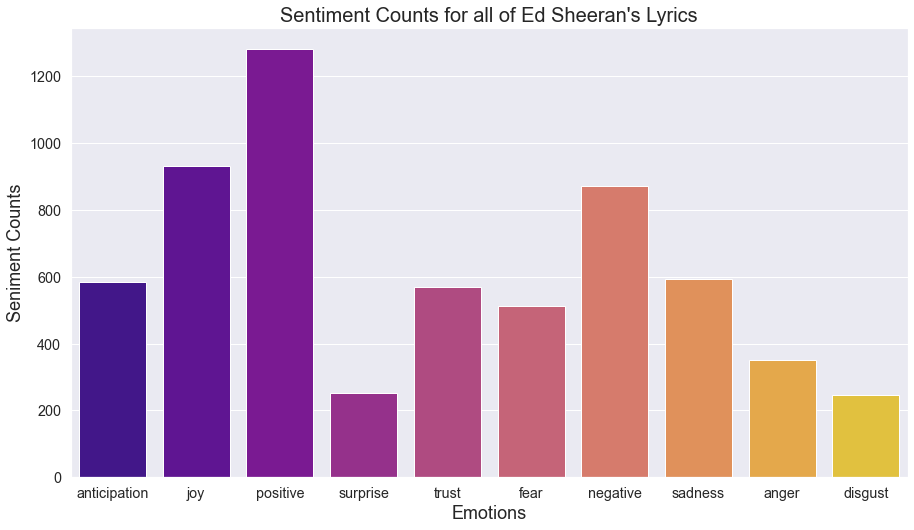

In [54]:
ESlyrics=""
for i in range(EdSheeran.shape[0]):
    if EdSheeran.iloc[i,3] in ESalbums:
        ESlyrics+=EdSheeran.iloc[i,6]
AGlyrics1=NRCLex(ESlyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Ed Sheeran's Lyrics", fontsize=20)

Text(0.5, 1.0, "Sentiment Counts for all of Eminem's Lyrics")

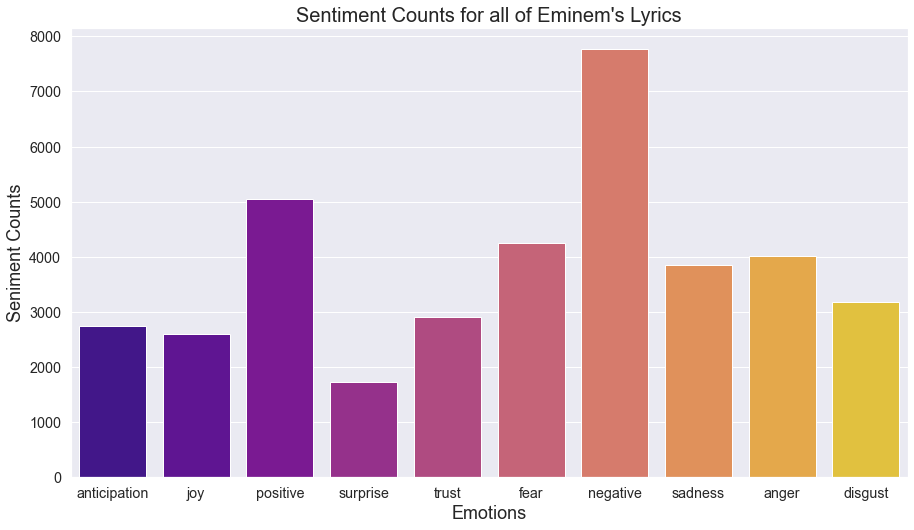

In [55]:
Elyrics=""
for i in range(Eminem.shape[0]):
    if Eminem.iloc[i,3] in Ealbums:
        Elyrics+=Eminem.iloc[i,6]
AGlyrics1=NRCLex(Elyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Eminem's Lyrics", fontsize=20)

Text(0.5, 1.0, "Sentiment Counts for all of Justin Bieber's Lyrics")

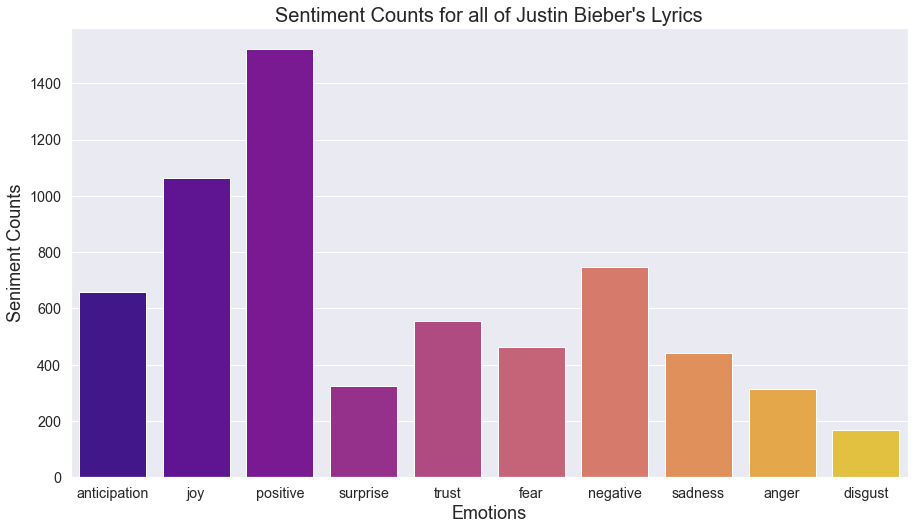

In [56]:
JBlyrics=""
for i in range(JustinBieber.shape[0]):
    if JustinBieber.iloc[i,3] in JBalbums:
        JBlyrics+=JustinBieber.iloc[i,6]
AGlyrics1=NRCLex(JBlyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Justin Bieber's Lyrics", fontsize=20)

Text(0.5, 1.0, "Sentiment Counts for all of Lady Gaga's Lyrics")

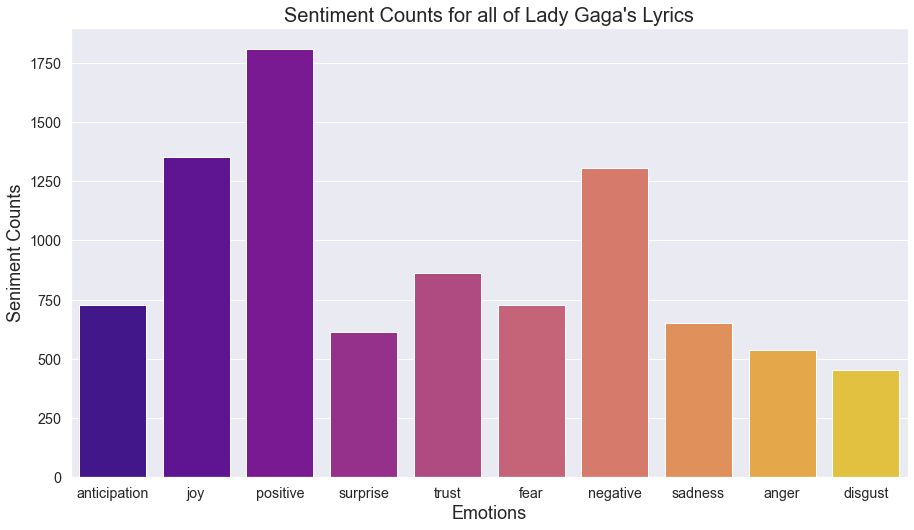

In [57]:
LGlyrics=""
for i in range(LadyGaga.shape[0]):
    if LadyGaga.iloc[i,3] in LGalbums:
        if type(LadyGaga.iloc[i,6]) == str:
            LGlyrics+=LadyGaga.iloc[i,6]
AGlyrics1=NRCLex(LGlyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Lady Gaga's Lyrics", fontsize=20)

Text(0.5, 1.0, "Sentiment Counts for all of Taylor Swift's Lyrics")

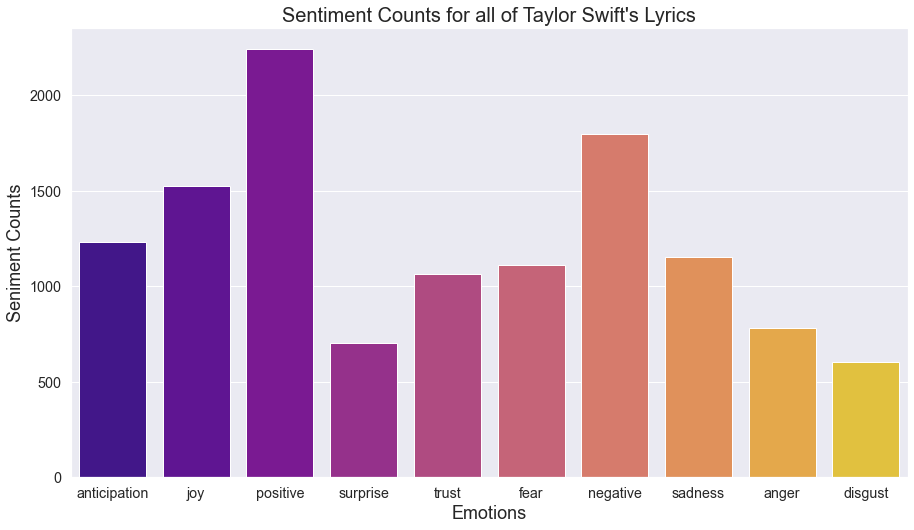

In [58]:
TSlyrics=""
for i in range(TaylorSwift.shape[0]):
    if TaylorSwift.iloc[i,3] in TSalbums:
        if type(TaylorSwift.iloc[i,6]) == str:
            TSlyrics+=TaylorSwift.iloc[i,6]
AGlyrics1=NRCLex(TSlyrics)
mydic1=mydic.copy()
for i in sortedkeys:
    if i in AGlyrics1.raw_emotion_scores:
        mydic1[i]=AGlyrics1.raw_emotion_scores[i]
keys=list(mydic1.keys())
values=list(mydic1.values())
sns.set(font_scale = 1.3)
ax = sns.barplot(x=keys, y=values, palette="plasma")
ax.set_xlabel("Emotions", fontsize = 18)
ax.set_ylabel("Seniment Counts", fontsize = 18)
ax.set_title("Sentiment Counts for all of Taylor Swift's Lyrics", fontsize=20)

In [59]:
artists

array(['Ariana Grande', 'Beyoncé', 'Billie Eilish', 'BTS (방탄소년단)',
       'Cardi B', 'Charlie Puth', 'Coldplay', 'Drake', 'Dua Lipa',
       'Ed Sheeran', 'Eminem', 'Justin Bieber', 'Katy Perry', 'Khalid',
       'Lady Gaga', 'Maroon 5', 'Nicki Minaj', 'Post Malone', 'Rihanna',
       'Selena Gomez', 'Taylor Swift'], dtype=object)

In [61]:
for k in artists:
    print(test[test["Artist"]==k])

            Artist                                         Title  \
0    Ariana Grande                                ​thank u, next   
1    Ariana Grande                                       7 rings   
2    Ariana Grande                               ​God is a woman   
3    Ariana Grande                                  Side To Side   
4    Ariana Grande                        ​​no tears left to cry   
..             ...                                           ...   
98   Ariana Grande                                     Too Close   
100  Ariana Grande                                 Cadillac Song   
102  Ariana Grande                   The Way (Spanglish Version)   
124  Ariana Grande  The Way (Spanglish Version) [feat. J Balvin]   
141  Ariana Grande                   Problem (Spanglish Version)   

               Album        Date  \
0      thank u, next  2018-11-03   
1      thank u, next  2019-01-18   
2          Sweetener  2018-07-13   
3    Dangerous Woman  2016-05-20   
4  

[98 rows x 6 columns]
           Artist             Title                        Album        Date  \
4497  Nicki Minaj              Only                The Pinkprint  2014-10-28   
4498  Nicki Minaj    Feeling Myself                The Pinkprint  2015-05-18   
4499  Nicki Minaj     Barbie Dreams        Queen (Bonus Version)  2018-08-10   
4500  Nicki Minaj    Truffle Butter                The Pinkprint  2015-01-23   
4501  Nicki Minaj           Chun-Li        Queen (Bonus Version)  2018-04-12   
...           ...               ...                          ...         ...   
4612  Nicki Minaj       Last Chance                  Pink Friday  2010-11-19   
4621  Nicki Minaj      Blow Ya Mind                  Pink Friday  2011-06-21   
4624  Nicki Minaj          Catch Me                  Pink Friday  2010-11-22   
4630  Nicki Minaj  Press Conference  Pink Friday: Roman Reloaded  2012-04-02   
4635  Nicki Minaj      Wave Ya Hand                  Pink Friday  2011-02-23   

                 

In [64]:
charts=pd.read_csv(r"C:\Users\melinadiaz\Downloads\charts.csv")
weekly= charts["date"].unique()
baddates=[]
for i in weekly:
    #if (i[8]==0 and (i[9]=="8" or i[9]=="9")) or i[8]!="0": 
    if (i[8]== "1" and (i[9]=="0" or i[9]=="2" or i[9]=="3" or i[9]=="4")) or (i[8]=="2" and i[9]!="1") or i[8]=="3" or (i[8]==0 and (i[9]=="8" or i[9]=="9")):
        baddates.append(i)

In [65]:
weeklycharts=charts[~charts['date'].isin(baddates)]
weeklycharts

date  rank                                 song  \
0       2021-11-06     1                           Easy On Me   
1       2021-11-06     2                                 Stay   
2       2021-11-06     3                        Industry Baby   
3       2021-11-06     4                           Fancy Like   
4       2021-11-06     5                           Bad Habits   
...            ...   ...                                  ...   
330082  1958-08-04    96                        Over And Over   
330083  1958-08-04    97                     I Believe In You   
330084  1958-08-04    98                      Little Serenade   
330085  1958-08-04    99  I'll Get By (As Long As I Have You)   
330086  1958-08-04   100                                 Judy   

                               artist  last-week  peak-rank  weeks-on-board  
0                               Adele        1.0          1               3  
1       The Kid LAROI & Justin Bieber        2.0          1              16  
2             Lil Nas X & Jack Harlow        3.0          1              14  
3                        Walker Hayes        4.0          3              19  
4                          Ed Sheeran        5.0          2              18  
...                               ...        ...        ...             ...  
330082                Thurston Harris        NaN         96               1  
330083                Robert & Johnny        NaN         97               1  
330084              The Ames Brothers        NaN         98               1  
330085                 Billy Williams        NaN         99               1  
330086                Frankie Vaughan        NaN        100               1  

[173492 rows x 7 columns]

In [66]:
AGch=weeklycharts[weeklycharts["artist"]=="Ariana Grande"]
AGch.sort_values("weeks-on-board", ascending=False)

date  rank             song         artist  last-week  peak-rank  \
11342  2019-09-07    43          7 Rings  Ariana Grande       37.0          1   
11629  2019-08-17    30          7 Rings  Ariana Grande       30.0          1   
2536   2021-05-15    37        Positions  Ariana Grande       34.0          1   
12947  2019-05-18    48    Thank U, Next  Ariana Grande       48.0          1   
2528   2021-05-15    29            34+35  Ariana Grande       27.0          2   
...           ...   ...              ...            ...        ...        ...   
16698  2018-09-01    99    Pete Davidson  Ariana Grande        NaN         99   
31106  2015-11-21     7            Focus  Ariana Grande        NaN          7   
29209  2016-04-02    10  Dangerous Woman  Ariana Grande        NaN         10   
29142  2016-04-09    43       Be Alright  Ariana Grande        NaN         43   
16686  2018-09-01    87   Goodnight N Go  Ariana Grande        NaN         87   

       weeks-on-board  
11342              32  
11629              29  
2536               28  
12947              27  
2528               27  
...               ...  
16698               1  
31106               1  
29209               1  
29142               1  
16686               1  

[195 rows x 7 columns]

In [67]:
AGfilter=AGch.groupby("song").count()
AGfilter

date  rank  artist  last-week  \
song                                                                      
34+35                                       13    13      13         13   
7 Rings                                     17    17      17         16   
Baby I                                       1     1       1          0   
Bad Idea                                     2     2       2          2   
Be Alright                                   1     1       1          0   
Bloodline                                    2     2       2          2   
Break Up With Your Girlfriend, I'm Bored    11    11      11         11   
Breathin                                    14    14      14         13   
Dangerous Woman                             12    12      12         11   
Everytime                                    1     1       1          0   
Fake Smile                                   1     1       1          1   
Focus                                        7     7       7          6   
Ghostin                                      1     1       1          1   
God Is A Woman                              12    12      12         12   
Goodnight N Go                               1     1       1          0   
Imagine                                      5     5       5          4   
In My Head                                   1     1       1          1   
Into You                                    12    12      12         11   
Just Like Magic                              1     1       1          1   
Last Christmas                               1     1       1          0   
Make Up                                      1     1       1          1   
NASA                                         2     2       2          2   
Needy                                        3     3       3          3   
No Tears Left To Cry                        15    15      15         14   
One Last Time                               11    11      11         11   
Pete Davidson                                1     1       1          0   
Positions                                   14    14      14         13   
R.E.M                                        1     1       1          0   
Santa Tell Me                                3     3       3          2   
Sweetener                                    1     1       1          0   
Test Drive                                   1     1       1          0   
Thank U, Next                               16    16      16         15   
pov                                         10    10      10          9   

                                          peak-rank  weeks-on-board  
song                                                                 
34+35                                            13              13  
7 Rings                                          17              17  
Baby I                                            1               1  
Bad Idea                                          2               2  
Be Alright                                        1               1  
Bloodline                                         2               2  
Break Up With Your Girlfriend, I'm Bored         11              11  
Breathin                                         14              14  
Dangerous Woman                                  12              12  
Everytime                                         1               1  
Fake Smile                                        1               1  
Focus                                             7               7  
Ghostin                                           1               1  
God Is A Woman                                   12              12  
Goodnight N Go                                    1               1  
Imagine                                           5               5  
In My Head                                        1               1  
Into You                                         12              12  
Just Like Magic 

In [68]:
AGfilter = AGch[AGch['song'].map(AGch['song'].value_counts()) > 12]
AGfilter["song"].sort_values().unique()

array(['34+35', '7 Rings', 'Breathin', 'No Tears Left To Cry',
       'Positions', 'Thank U, Next'], dtype=object)

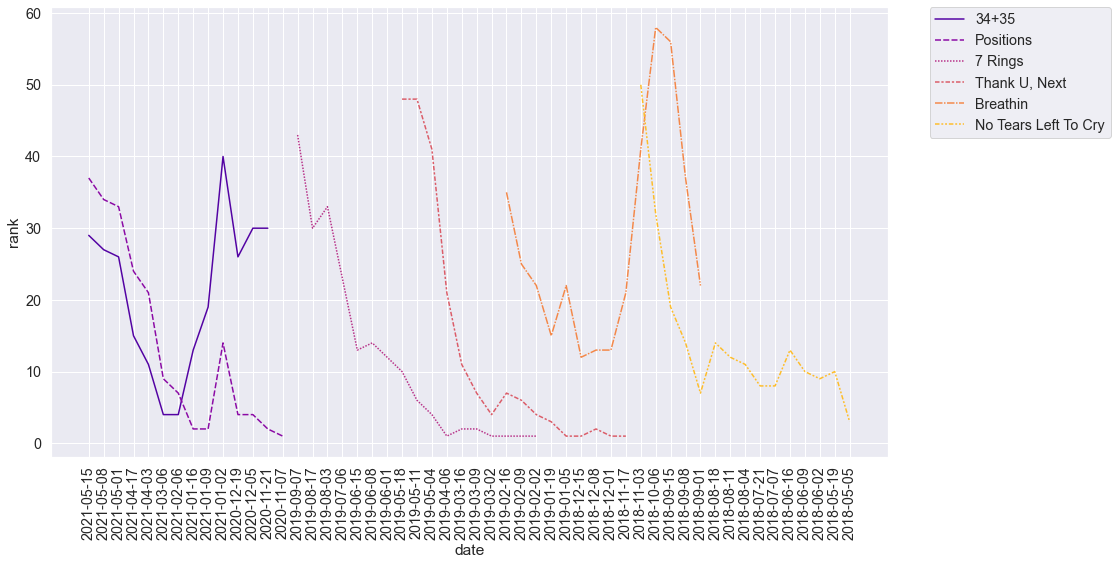

In [69]:
#these are ugly so I didn't include them
ax=sns.lineplot(data=AGfilter, x="date", y="rank", hue="song", style="song", palette="plasma")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [70]:
sns.set(rc={'figure.figsize':(15,8.27)})

In [71]:
Bch=weeklycharts[weeklycharts["artist"]=="Beyonce"]
Bfilter = Bch[Bch['song'].map(Bch['song'].value_counts()) > 6]
Bfilter["song"].sort_values().unique()
Bch.groupby("song").count()


date  rank  artist  last-week  peak-rank  \
song                                                                         
1+1                                  2     2       2          1          2   
7/11                                 9     9       9          9          9   
All Night                            1     1       1          1          1   
At Last                              1     1       1          0          1   
Before I Let Go                      9     9       9          8          9   
Best Thing I Never Had              10    10      10          9         10   
Black Parade                         2     2       2          1          2   
Countdown                            8     8       8          8          8   
Daddy Lessons                        1     1       1          1          1   
Dance For You                        6     6       6          6          6   
Dangerously In Love                 11    11      11         10         11   
Diva                                12    12      12         11         12   
Ego                                  9     9       9          9          9   
Formation                            4     4       4          4          4   
Get Me Bodied                       10    10      10          9         10   
Halo                                18    18      18         17         18   
Hold Up                              7     7       7          7          7   
If I Were A Boy                      9     9       9          9          9   
Irreplaceable                       15    15      15         14         15   
Listen                               5     5       5          4          5   
Love Drought                         1     1       1          1          1   
Love On Top                         10    10      10          9         10   
Me, Myself And I                     9     9       9          8          9   
Naughty Girl                        11    11      11         11         11   
Partition                           11    11      11         11         11   
Pray You Catch Me                    1     1       1          1          1   
Ring The Alarm                       8     8       8          8          8   
Run The World (Girls)                8     8       8          7          8   
Sandcastles                          1     1       1          1          1   
Single Ladies (Put A Ring On It)    14    14      14         13         14   
Sorry                               10    10      10         10         10   
Sweet Dreams                        14    14      14         13         14   
XO                                   8     8       8          7          8   

                                  weeks-on-board  
song                                              
1+1                                            2  
7/11                                           9  
All Night                                      1  
At Last                                        1  
Before I Let Go                                9  
Best Thing I Never Had                        10  
Black Parade                                   2  
Countdown                                      8  
Daddy Lessons                                  1  
Dance For You                                  6  
Dangerously In Love                           11  
Diva                                          12  
Ego                                            9  
Formation                                      4  
Get Me Bodied                                 10  
Halo                                          18  
Hold Up                                        7  
If I Were A Boy                                9  
Irreplaceable                                 15  
Listen                                         5  
Love Drought                                   1  
Love On Top                                   10  
Me, Myself And I                               9  
Naughty Girl                

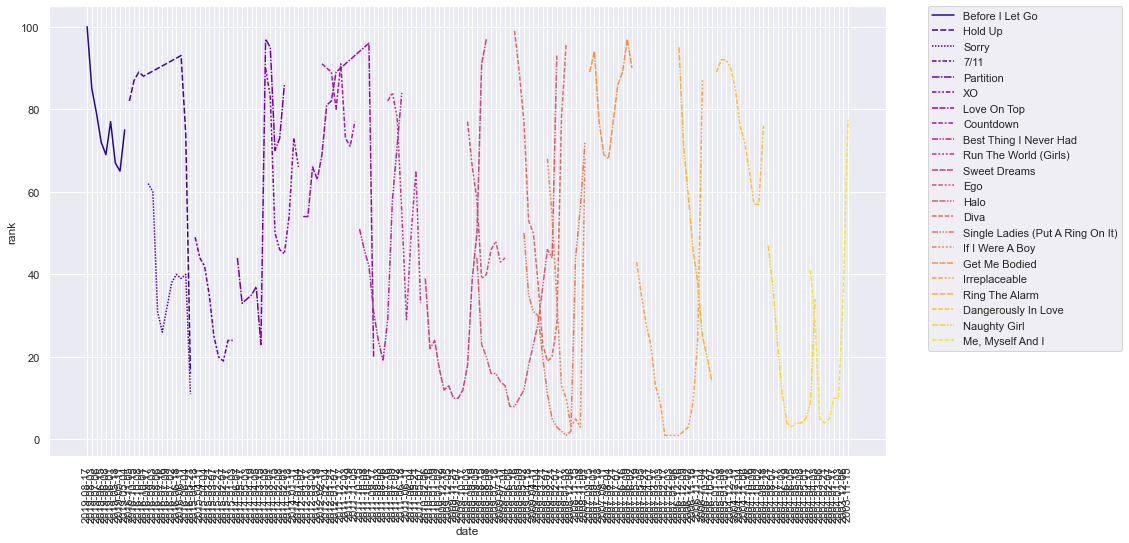

In [73]:
ax=sns.lineplot(data=Bfilter, x="date", y="rank", hue="song", style="song", palette="plasma")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [74]:
Dch=weeklycharts[weeklycharts["artist"]=="Drake"]
Dfilter = Dch[Dch['song'].map(Dch['song'].value_counts()) > 5]
Dfilter["song"].sort_values().unique()
Dch.groupby("song").count().sort_values("rank")

date  rank  artist  last-week  peak-rank  weeks-on-board
song                                                                          
Wu-Tang Forever          1     1       1          1          1               1
Dreams Money Can Buy     1     1       1          0          1               1
Elevate                  1     1       1          1          1               1
Skepta Interlude         1     1       1          0          1               1
Shot For Me              1     1       1          0          1               1
...                    ...   ...     ...        ...        ...             ...
Controlla               14    14      14         13         14              14
Fake Love               14    14      14         14         14              14
Nice For What           15    15      15         14         15              15
Hotline Bling           17    17      17         17         17              17
God's Plan              20    20      20         19         20              20

[100 rows x 6 columns]

In [75]:
Dch.sort_values("weeks-on-board", ascending=False)

date  rank              song artist  last-week  peak-rank  \
16144  2018-10-06    45        God's Plan  Drake       40.0          1   
29037  2016-04-16    38     Hotline Bling  Drake       34.0          2   
29133  2016-04-09    34     Hotline Bling  Drake       28.0          2   
29227  2016-04-02    28     Hotline Bling  Drake       27.0          2   
16436  2018-09-15    37        God's Plan  Drake       30.0          1   
...           ...   ...               ...    ...        ...        ...   
11694  2019-08-17    95  Days In The East  Drake        NaN         95   
34869  2015-03-07    70     Know Yourself  Drake        NaN         70   
34880  2015-03-07    81        No Tellin'  Drake        NaN         81   
34882  2015-03-07    83             6 God  Drake        NaN         83   
28585  2016-05-21    86             Views  Drake        NaN         86   

       weeks-on-board  
16144              36  
29037              35  
29133              34  
29227              33  
16436              33  
...               ...  
11694               1  
34869               1  
34880               1  
34882               1  
28585               1  

[448 rows x 7 columns]

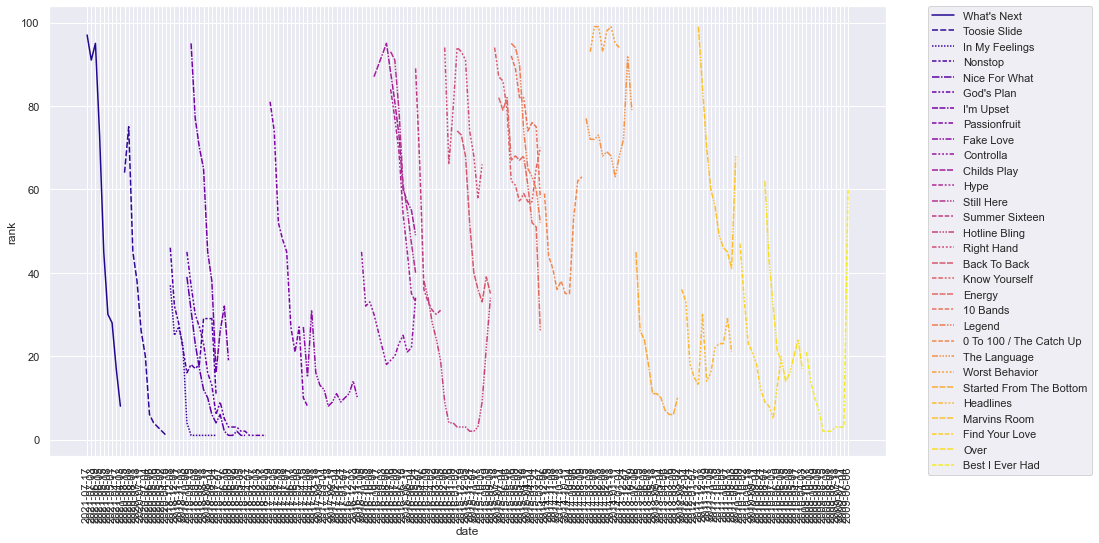

In [76]:
ax=sns.lineplot(data=Dfilter, x="date", y="rank", hue="song", style="song", palette="plasma")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [77]:
AGch=charts[charts["artist"]=="Ariana Grande"]
AGch.sort_values("weeks-on-board", ascending=False)

date  rank        song         artist  last-week  peak-rank  \
11239  2019-09-14    40     7 Rings  Ariana Grande       43.0          1   
11342  2019-09-07    43     7 Rings  Ariana Grande       37.0          1   
11436  2019-08-31    37     7 Rings  Ariana Grande       29.0          1   
11528  2019-08-24    29     7 Rings  Ariana Grande       30.0          1   
2436   2021-05-22    37   Positions  Ariana Grande       37.0          1   
...           ...   ...         ...            ...        ...        ...   
14923  2018-12-29    24     Imagine  Ariana Grande        NaN         24   
14147  2019-02-23    48     Make Up  Ariana Grande        NaN         48   
14137  2019-02-23    38  In My Head  Ariana Grande        NaN         38   
14126  2019-02-23    27    Bad Idea  Ariana Grande        NaN         27   
43020  2013-08-10    21      Baby I  Ariana Grande        NaN         21   

       weeks-on-board  
11239              33  
11342              32  
11436              31  
11528              30  
2436               29  
...               ...  
14923               1  
14147               1  
14137               1  
14126               1  
43020               1  

[366 rows x 7 columns]

In [78]:
AGfilter=AGch.groupby("song").first()
AGfilter=AGfilter[AGfilter["weeks-on-board"]>10]
AGfilter=AGfilter.reset_index()

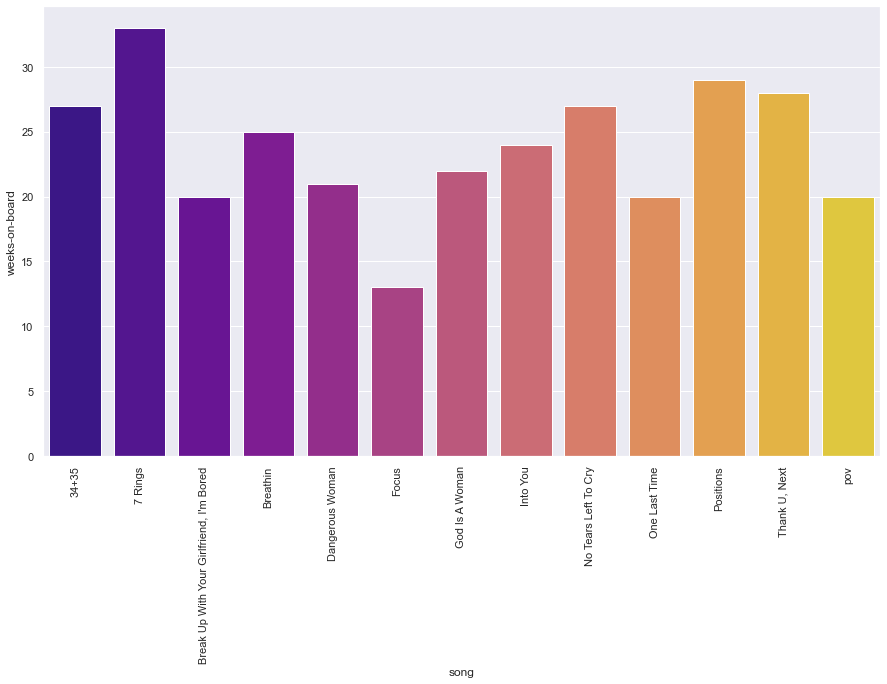

In [79]:
ax = sns.barplot(data=AGfilter, x="song", y="weeks-on-board", palette="plasma")
ax.tick_params(axis='x', rotation=90)

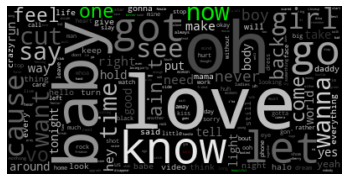

In [27]:
#I was trying to color words by part of speech (verb, adjective, noun), but I couldn't find a dictionary-like
#package that knew the part of speech of words, and I didn't want to make lists from scratch

from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = Blyrics

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()